In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function that calculates the V Cramer's coefficient between two variables

# INPUT:
# x: first variable
# y: second variable
# OUTPUT:
# V Cramer's coefficient between the two variables

def cramers_v(x, y):
    # Create the confusion matrix
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = ss.chi2_contingency(confusion_matrix) # dof y expected no se usan
    # If the p-value is greater than 0.05, we return a NaN value
    if p >= 0.05:
        return np.nan
    # number of observations
    n = confusion_matrix.sum().sum()
    # we calculate phi2
    phi2 = chi2 / n
    # dimentions of the confusion matrix
    r, k = confusion_matrix.shape
    # correction of phi2 and dimensions of the confusion matrix
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # V-Cramer correction
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Function that plots the heatmap of the V Cramer's coefficients between the variables of a DataFrame

# INPUT:
# df: DataFrame with the data
# exclude: list with the variables that are going to be ignored in the analysis. By default it is an empty list
# OUTPUT:
# CRAMER'S V HEATMAP

def plot_cramers_v_heatmap(df, exclude=[]):
    df = df.drop(columns=exclude, errors='ignore')
    cols = df.columns
    corrM = np.zeros((len(cols), len(cols)))
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            corrM[i, j] = cramers_v(df[col1], df[col2])
    corrM_df = pd.DataFrame(corrM, index=cols, columns=cols)
    plt.figure(figsize=(15, 15))
    sns.heatmap(corrM_df, cmap='coolwarm', mask=np.isnan(corrM_df), cbar=True)
    plt.title("Cramér's V Heatmap")
    plt.show()

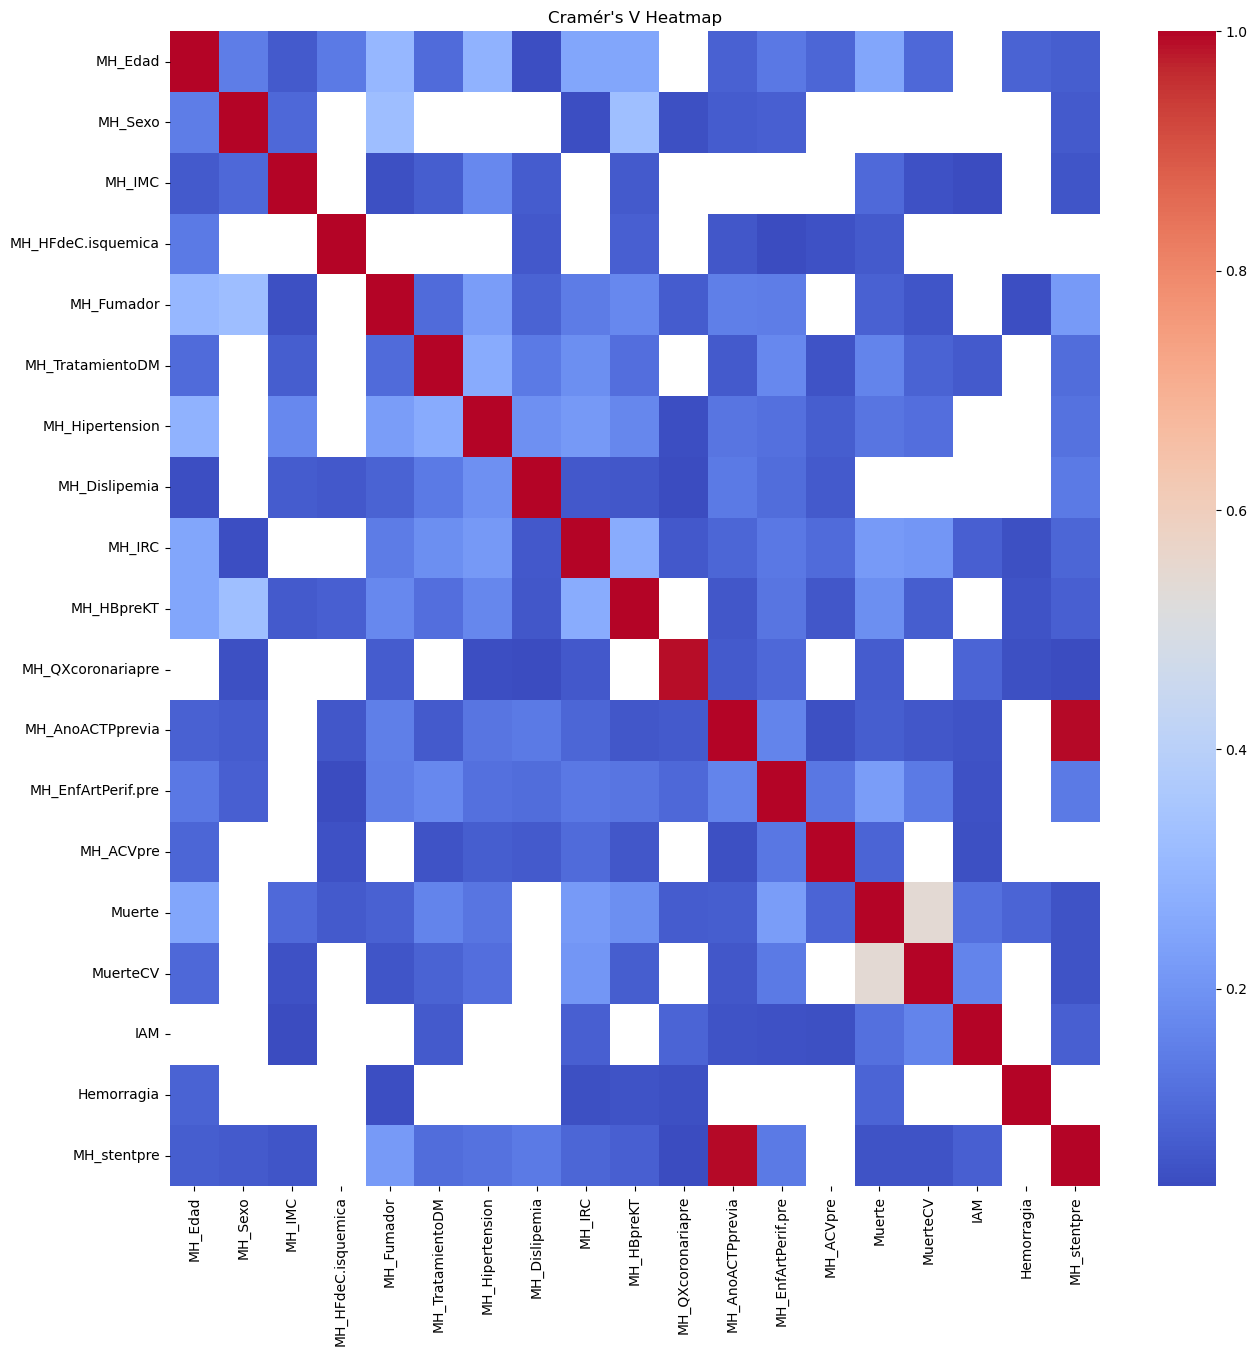

In [3]:
medicalhistory_df = pd.read_csv('medicalhistory.csv')
exclude_vars = ['ID']
plot_cramers_v_heatmap(medicalhistory_df, exclude=exclude_vars)

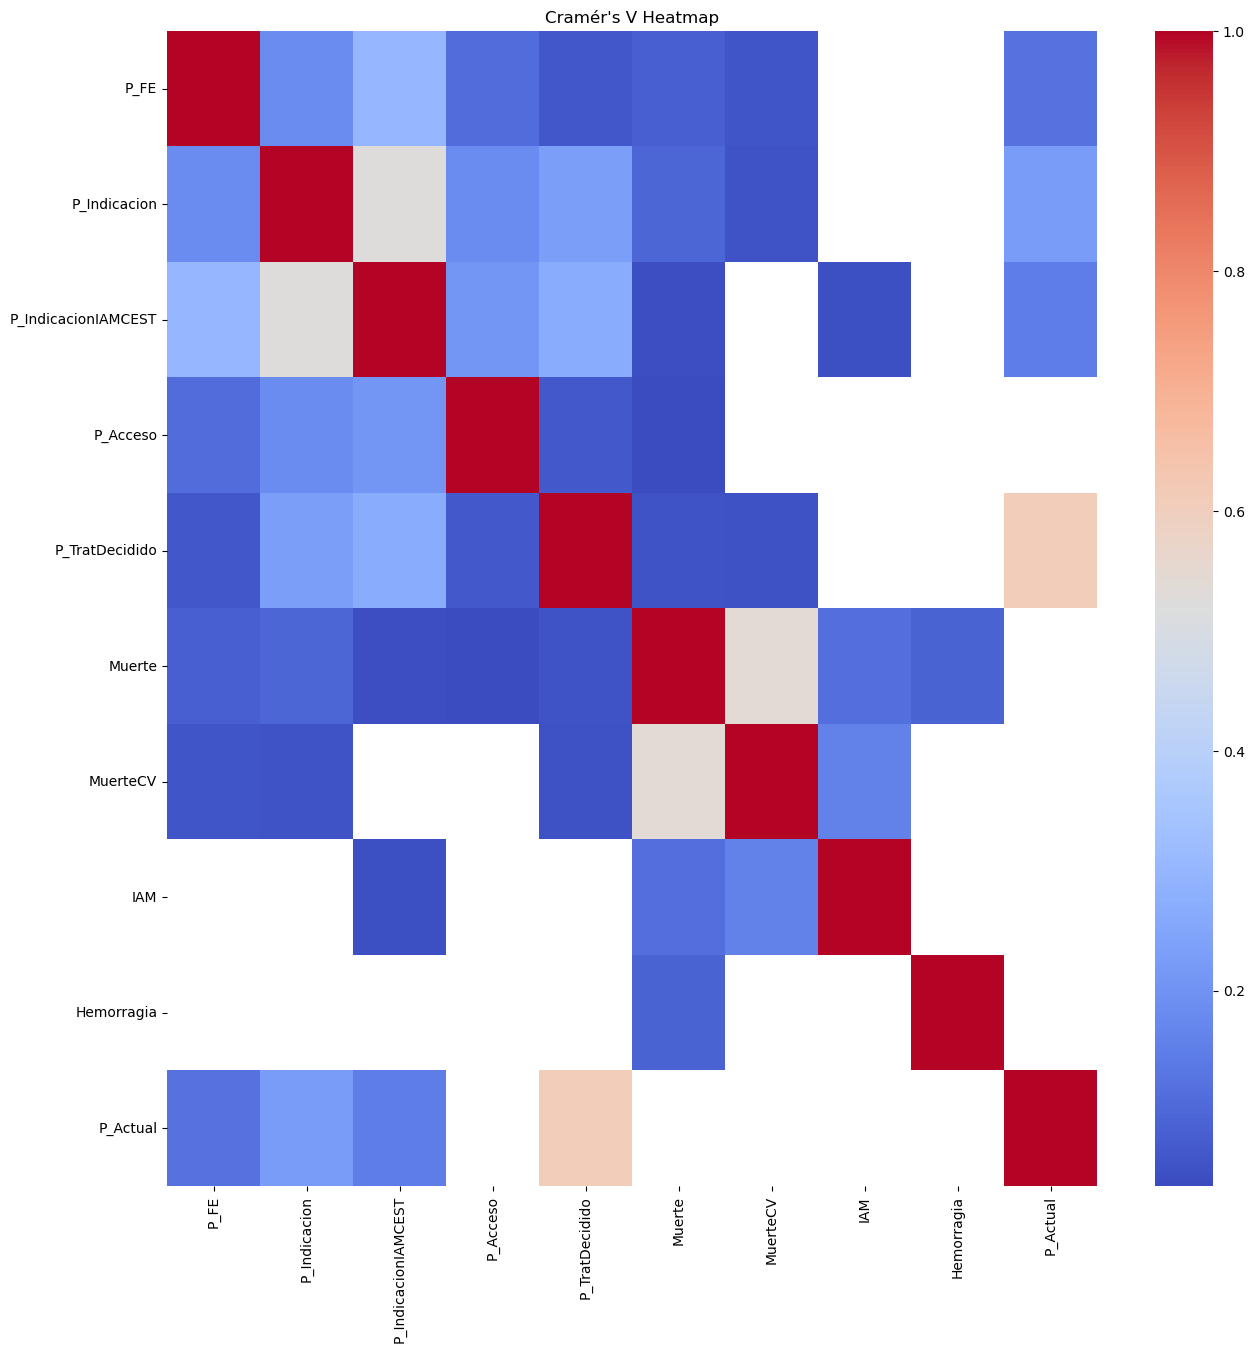

In [4]:
procedures_df = pd.read_csv('procedures.csv')
exclude_vars = ['ID']
plot_cramers_v_heatmap(procedures_df, exclude=exclude_vars)

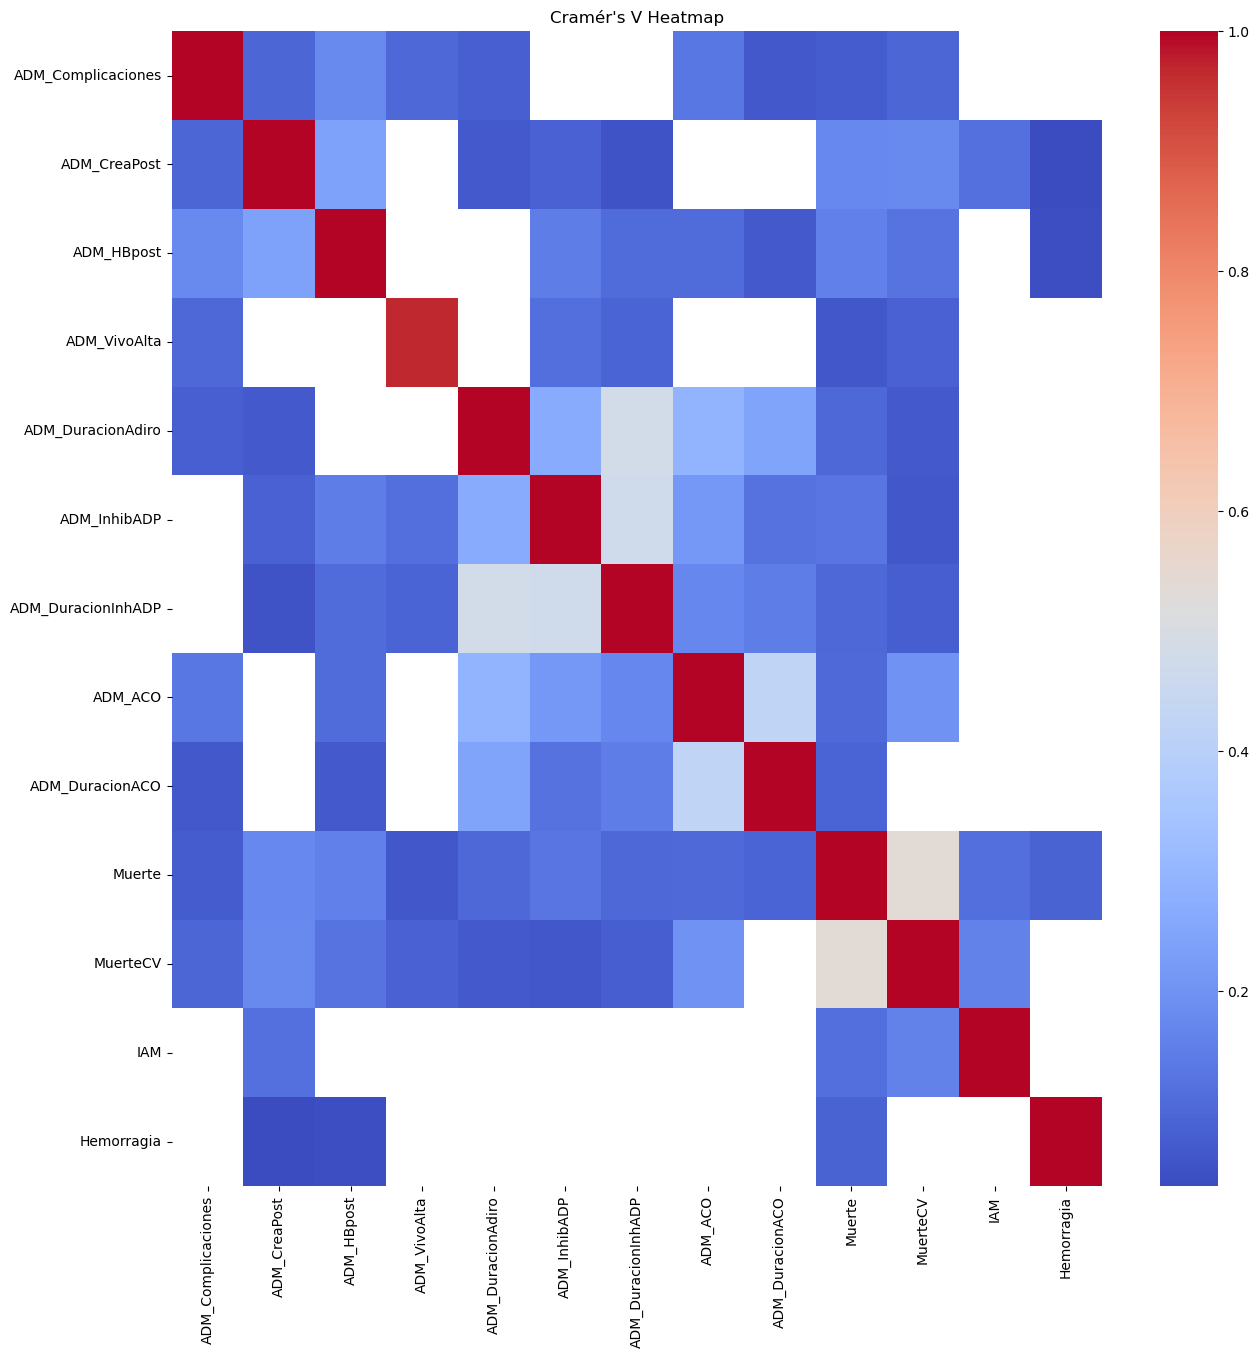

In [6]:
admissions_df = pd.read_csv('admission.csv')
exclude_vars = ['ID']
plot_cramers_v_heatmap(admissions_df, exclude=exclude_vars)

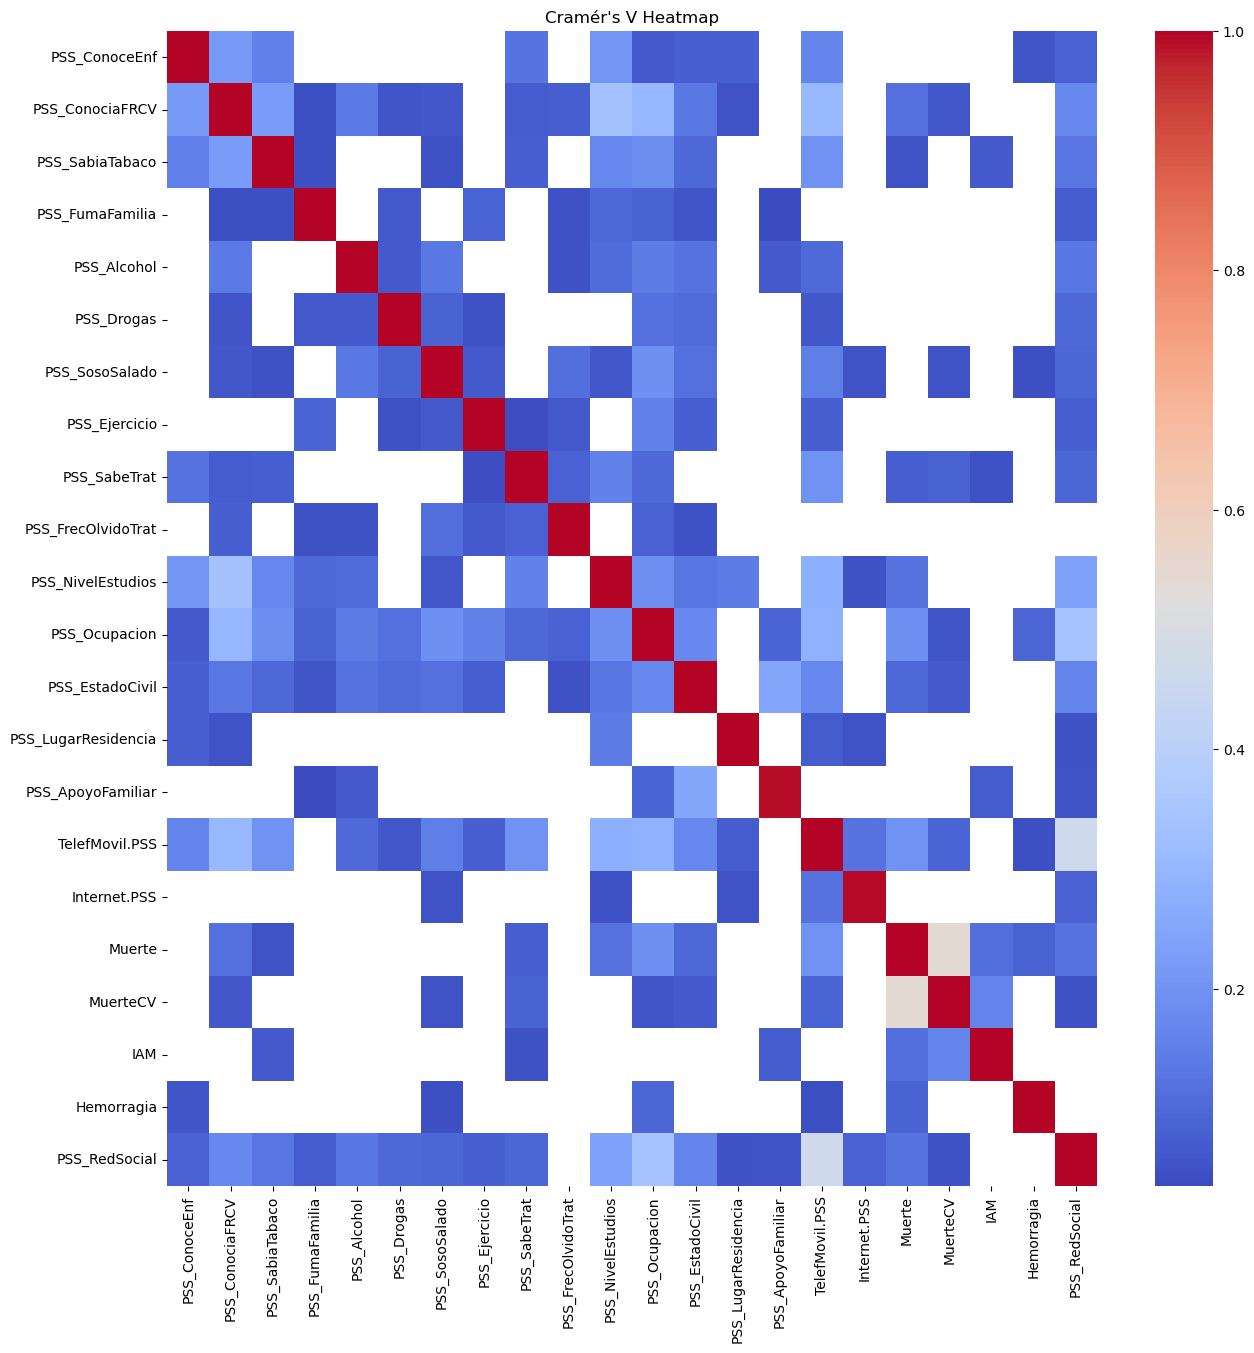

In [7]:
pss_df = pd.read_csv('pss.csv')
exclude_vars = ['ID']
plot_cramers_v_heatmap(pss_df, exclude=exclude_vars)

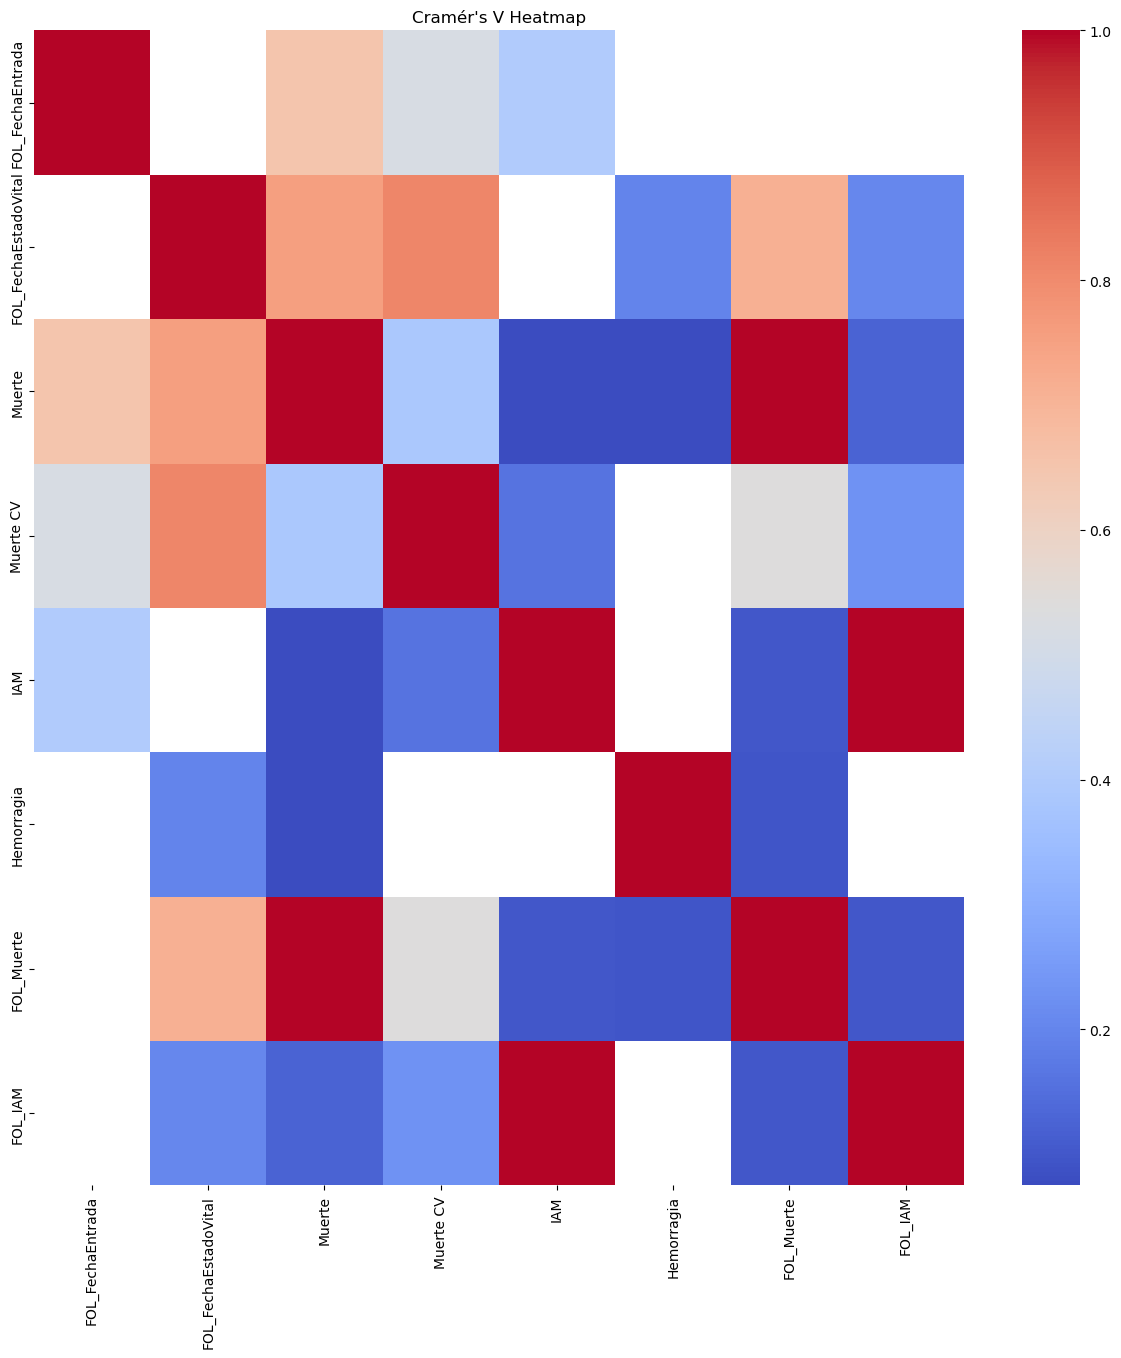

In [8]:
fol_df = pd.read_csv('fol.csv')
exclude_vars = ['ID']
plot_cramers_v_heatmap(fol_df, exclude=exclude_vars)